# Covid-19-India-Data Analysis

 ###  Loading the Libraries

In [143]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from random import randint

from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings

## 1. Data Collection

The COVID-19 pandemic in India is a part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). As of 25 August 2022, according to Indian government figures, India has the second-highest number of confirmed cases in the world (after the United States of America) with 44,378,920 reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 527,488 deaths.In May 2022, the World Health Organization reported the number of Covid deaths in India to be an estimated 4.7 million mainly during a surge in May - June 2021, a figure that is almost 10 times the Indian government's estimate and nearly a third of the estimated global Covid deaths. The figure is similar to other estimates of Indian Covid deaths, but Indian authorities have rejected these estimates and questioned the methodology used


This dataset has information from the states and union territories of India at daily level.The data on covid-19 in India is collected from https://www.mohfw.gov.in/ website

In [144]:
## Load data from CovidData_India.xlsx file to data set covid_data

covid_data=pd.read_excel("CovidData_India.xlsx")



raw_1 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
raw_2 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
raw_3 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
raw_4 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
raw_5 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
raw_6 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')
raw_7 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')
raw_8 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data8.csv')
raw_9 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data9.csv')
raw_10 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data10.csv')
raw_11 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data11.csv')
raw_12 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data12.csv')


# concatenate datas
full_data = pd.concat([raw_1, raw_2, raw_3, raw_4, raw_5, 
                       raw_6, raw_7, raw_8, raw_9, raw_10, 
                       raw_11, raw_12])

# Number of rows and column
print("Column, Row")
print(full_data.shape)

## Show first five rows in the Covid_data data set

covid_data.head()




Column, Row
(247233, 22)


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0


### descriptive analytics on the  Covid dataset

In [145]:
print("Number of elements per axis(dimension)")
covid_data.shape

Number of elements per axis(dimension)


(4692, 10)

In [146]:
covid_data.describe()

,Latitude,Longitude,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4692.000000,4692.000000,4692.000000,4689.000000,4692.000000,4692.0,4690.000000
mean,23.185327,81.451837,11393.925192,6912.550437,418.643009,0.0,283.189765
std,6.635913,6.959475,37208.600846,23397.501257,1259.748923,0.0,948.109918
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,-1.000000
25%,18.112400,76.271100,39.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,198.000000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,2745.000000,210.250000,0.0,119.000000
max,34.299600,94.727800,468265.000000,305521.000000,18366.000000,0.0,13401.000000


In [147]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4692 non-null   datetime64[ns]
 1   Name of State / UT         4692 non-null   object        
 2   Latitude                   4692 non-null   float64       
 3   Longitude                  4692 non-null   float64       
 4   Total Confirmed cases      4692 non-null   int64         
 5   Death                      4692 non-null   object        
 6   Cured/Discharged/Migrated  4689 non-null   float64       
 7   New cases                  4692 non-null   int64         
 8   New deaths                 4692 non-null   int64         
 9   New recovered              4690 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 366.7+ KB


## 2. Data Preprocessing on Covid Data

In [148]:
# Deaths column is Object, so its convert to Int

covid_data.loc[covid_data['Death'] == '0#']
covid_data.drop(2241,axis=0, inplace=True)
covid_data["Death"] = covid_data["Death"].astype(str).astype(int)

In [149]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4691 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4691 non-null   datetime64[ns]
 1   Name of State / UT         4691 non-null   object        
 2   Latitude                   4691 non-null   float64       
 3   Longitude                  4691 non-null   float64       
 4   Total Confirmed cases      4691 non-null   int64         
 5   Death                      4691 non-null   int32         
 6   Cured/Discharged/Migrated  4688 non-null   float64       
 7   New cases                  4691 non-null   int64         
 8   New deaths                 4691 non-null   int64         
 9   New recovered              4689 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(1)
memory usage: 384.8+ KB


In [150]:
covid_data.describe()

,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4691.000000,4691.000000,4691.000000,4691.000000,4688.000000,4691.000000,4691.0,4689.000000
mean,23.187724,81.452187,11396.348540,291.280750,6914.022824,418.732253,0.0,283.250160
std,6.634589,6.960175,37212.197127,1213.817206,23399.779867,1259.868384,0.0,948.202011
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,18.112400,76.271100,39.000000,0.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,5.000000,198.000000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,68.500000,2746.500000,210.500000,0.0,119.000000
max,34.299600,94.727800,468265.000000,16476.000000,305521.000000,18366.000000,0.0,13401.000000


We can got the Central tendency of Covid data set.

The describe() method is used to get a summary of numeric values in the covid_data dataset. It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. It also counts the number of variables in the dataset.

#### *_1. Missing value handling_*

In [151]:
# Checking for Null Values
covid_data.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    3
New cases                    0
New deaths                   0
New recovered                2
dtype: int64

* Null values are present in the Data set. Got the Null values for Cured/Discharged/Migrated and New recovered. *


##### Handling NaN in 'Cured/Discharged/Migrated'

6.530116734559108


<AxesSubplot:xlabel='Cured/Discharged/Migrated', ylabel='Density'>

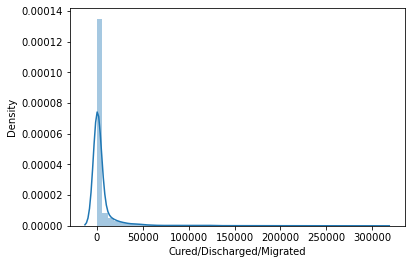

In [152]:
covid_data1=covid_data
print(covid_data1["Cured/Discharged/Migrated"].skew())
sns.distplot(covid_data1["Cured/Discharged/Migrated"])



In this case, we can proceed to fill the missing values with Mean/Median while Cured/Discharged/Migrated is having null values

In [153]:
covid_data1["Cured/Discharged/Migrated"] = covid_data1["Cured/Discharged/Migrated"].fillna(covid_data1["Cured/Discharged/Migrated"].median())
covid_data1.isna().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                2
dtype: int64

In [154]:
covid_data1

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103.0,2092,0,1289.0
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793.0,97,0,68.0
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558.0,4078,0,3287.0
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233.0,246,0,386.0


##### Handling NaN in 'New recovered'

6.466796332977361


<AxesSubplot:xlabel='New recovered', ylabel='Density'>

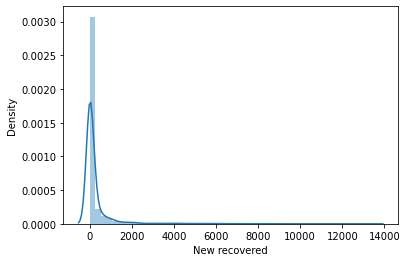

In [155]:
print(covid_data1["New recovered"].skew())
sns.distplot(covid_data1["New recovered"])

In this case, we can proceed to fill the missing values with Mean/Median while New recovered is having null values

In [156]:
covid_data1["New recovered"] = covid_data1["New recovered"].fillna(covid_data1["New recovered"].median())
covid_data1.isna().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [157]:
covid_data1


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103.0,2092,0,1289.0
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793.0,97,0,68.0
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558.0,4078,0,3287.0
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233.0,246,0,386.0


In [158]:
# Checking for Null Values
covid_data1.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

Handling all Null values by Mean/Median of Dataset

<AxesSubplot:>

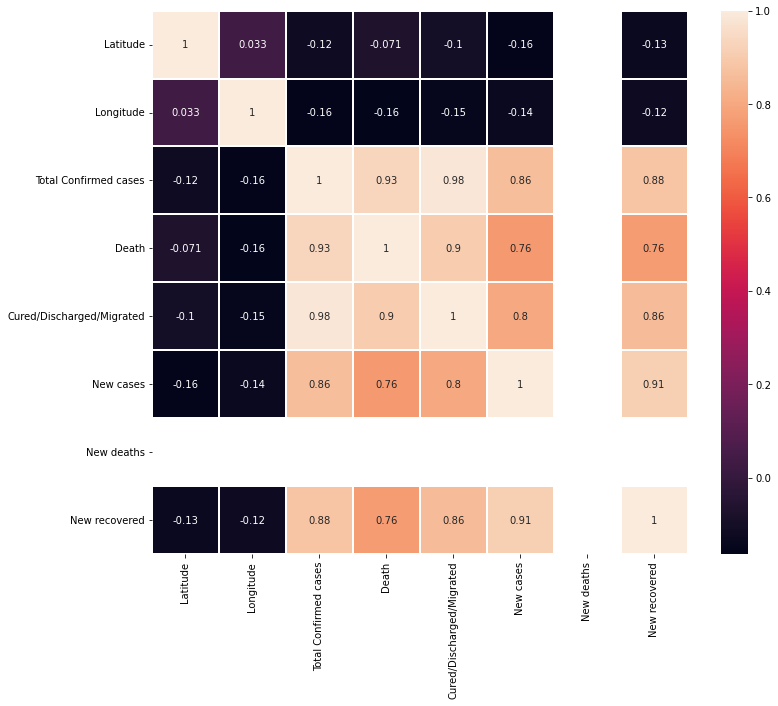

In [159]:
# Checking and plotting Correlation :
corrmatrix=covid_data1.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2)

###### Creating a RandomForest Regression model before removing the outliers.


*Since RF are immune to outliers in dataset

In [160]:
covid_data1.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0


In [161]:
covid_data1.columns

Index(['Date', 'Name of State / UT', 'Latitude', 'Longitude',
       'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated',
       'New cases', 'New deaths', 'New recovered'],
      dtype='object')

In this model we'll be trying to predict the future Death count.

In [162]:
x1 = covid_data1.drop(["Date",'Name of State / UT','Death'], axis=1)
y1 = covid_data1["Death"]

In [163]:
# Splitting our dataset into testing and training data

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=150)

# Importing our Random Forest Regressor library

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x1_train,y1_train)
rf_pred = rf_model.predict(x1_test)

rmse = sqrt(mean_squared_error(y1_test,rf_pred))

print("MAE = ", mean_absolute_error(y1_test,rf_pred))
print("MSE = ", mean_squared_error(y1_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y1_test,rf_pred))

MAE =  23.53006749076442
MSE =  13033.02369486182
RMSE =  114.16226913854604
R2 Value =  0.9925882465291178


In [164]:
rf_model = RandomForestRegressor(n_estimators=500,max_depth=20 )
rf_model.fit(x1_train,y1_train)
rf_pred = rf_model.predict(x1_test)

rmse = sqrt(mean_squared_error(y1_test,rf_pred))

print("MAE = ", mean_absolute_error(y1_test,rf_pred))
print("MSE = ", mean_squared_error(y1_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y1_test,rf_pred))

MAE =  24.06584064885923
MSE =  13203.0904326197
RMSE =  114.90470152530618
R2 Value =  0.9924915312339285


From the above models it seems that we can use the Random Forest Regressor for the death prediction models (even if outliers are present in the data).

But before being conclusive about it we'll check to see if a better model exists.

##### 2.Outlier detection and handling

Analyzing Outliers for various features

<AxesSubplot:>

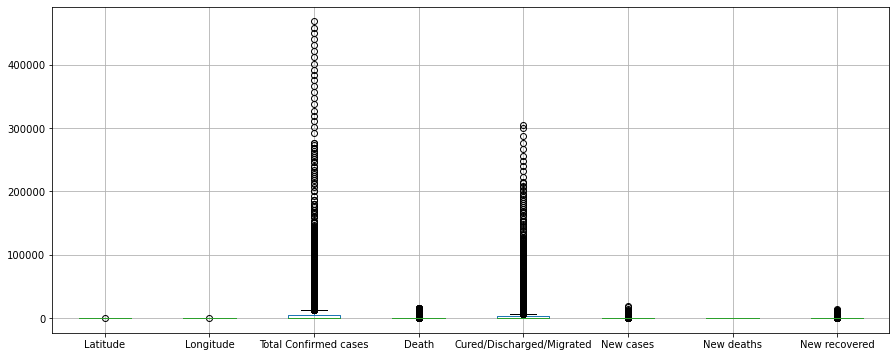

In [165]:
##outlier Analysis
plt.figure(figsize=(15,6))
covid_data1.boxplot()
## This will form a Box-plot for the skewed feature of specified columns

Here <b>Total Confirmed Cases, Death , <b>Cured/Discharged/Migrated, <b>New cases, <b>New Recovered and <b>Active cases shows some outliers.

Among these attributes <b>Total Confirmed cases, <b>Cured/Discharged/Migrated and <b>Active_cases shows something large.

<b>Handling the Outliers

a) For Total Confirmed cases

In [166]:
## Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach.
covid_data2=covid_data1
Q1 = np.percentile(covid_data2['Total Confirmed cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data2['Total Confirmed cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data2['Total Confirmed cases'][(covid_data2['Total Confirmed cases']>upper)|(covid_data2['Total Confirmed cases']<lower)].index
covid_data2.drop(index,inplace=True)
covid_data2.shape

First Quantile: 39.0
Third Quantile: 5233.0
IQR: 5194.0
Upper limit: 13024.0
Lower limit: -7752.0


(3937, 10)

b) For Cured/Discharged/Migrated

In [167]:
Q1 = np.percentile(covid_data2['Cured/Discharged/Migrated'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data2['Cured/Discharged/Migrated'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index = covid_data2['Cured/Discharged/Migrated'][(covid_data2['Cured/Discharged/Migrated']>upper)|(covid_data2['Cured/Discharged/Migrated']<lower)].index
covid_data2.drop(index,inplace=True)
covid_data2.shape

First Quantile: 3.0
Third Quantile: 869.0
IQR: 866.0
Upper limit: 2168.0
Lower limit: -1296.0


(3406, 10)

c) For Death

In [168]:
Q1 = np.percentile(covid_data2['Death'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data2['Death'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data2['Death'][(covid_data2['Death']>upper)|(covid_data2['Death']<lower)].index
covid_data2.drop(index,inplace=True)
covid_data2.shape

First Quantile: 0.0
Third Quantile: 7.0
IQR: 7.0
Upper limit: 17.5
Lower limit: -10.5


(2875, 10)

d) For New Cases

In [169]:
Q1 = np.percentile(covid_data1['New cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['New cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['New cases'][(covid_data1['New cases']>upper)|(covid_data1['New cases']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 0.0
Third Quantile: 21.0
IQR: 21.0
Upper limit: 52.5
Lower limit: -31.5


(2518, 10)

e) For New recovered

In [170]:
Q1 = np.percentile(covid_data2['New recovered'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data2['New recovered'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data2['New recovered'][(covid_data2['New recovered']>upper)|(covid_data2['New recovered']<lower)].index
covid_data2.drop(index,inplace=True)
covid_data2.shape

First Quantile: 0.0
Third Quantile: 3.0
IQR: 3.0
Upper limit: 7.5
Lower limit: -4.5


(2103, 10)

<AxesSubplot:>

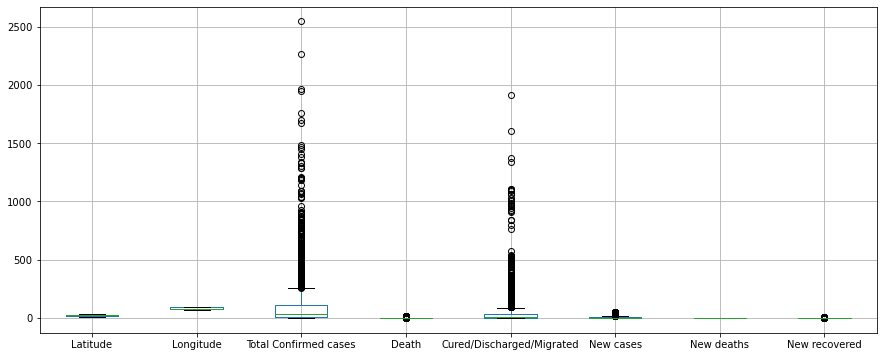

In [171]:
# Redoing the outlier Analysis

plt.figure(figsize=(15,6))
covid_data2.boxplot()

After handling the outliers our dataset have 1950 rows and 10 columns

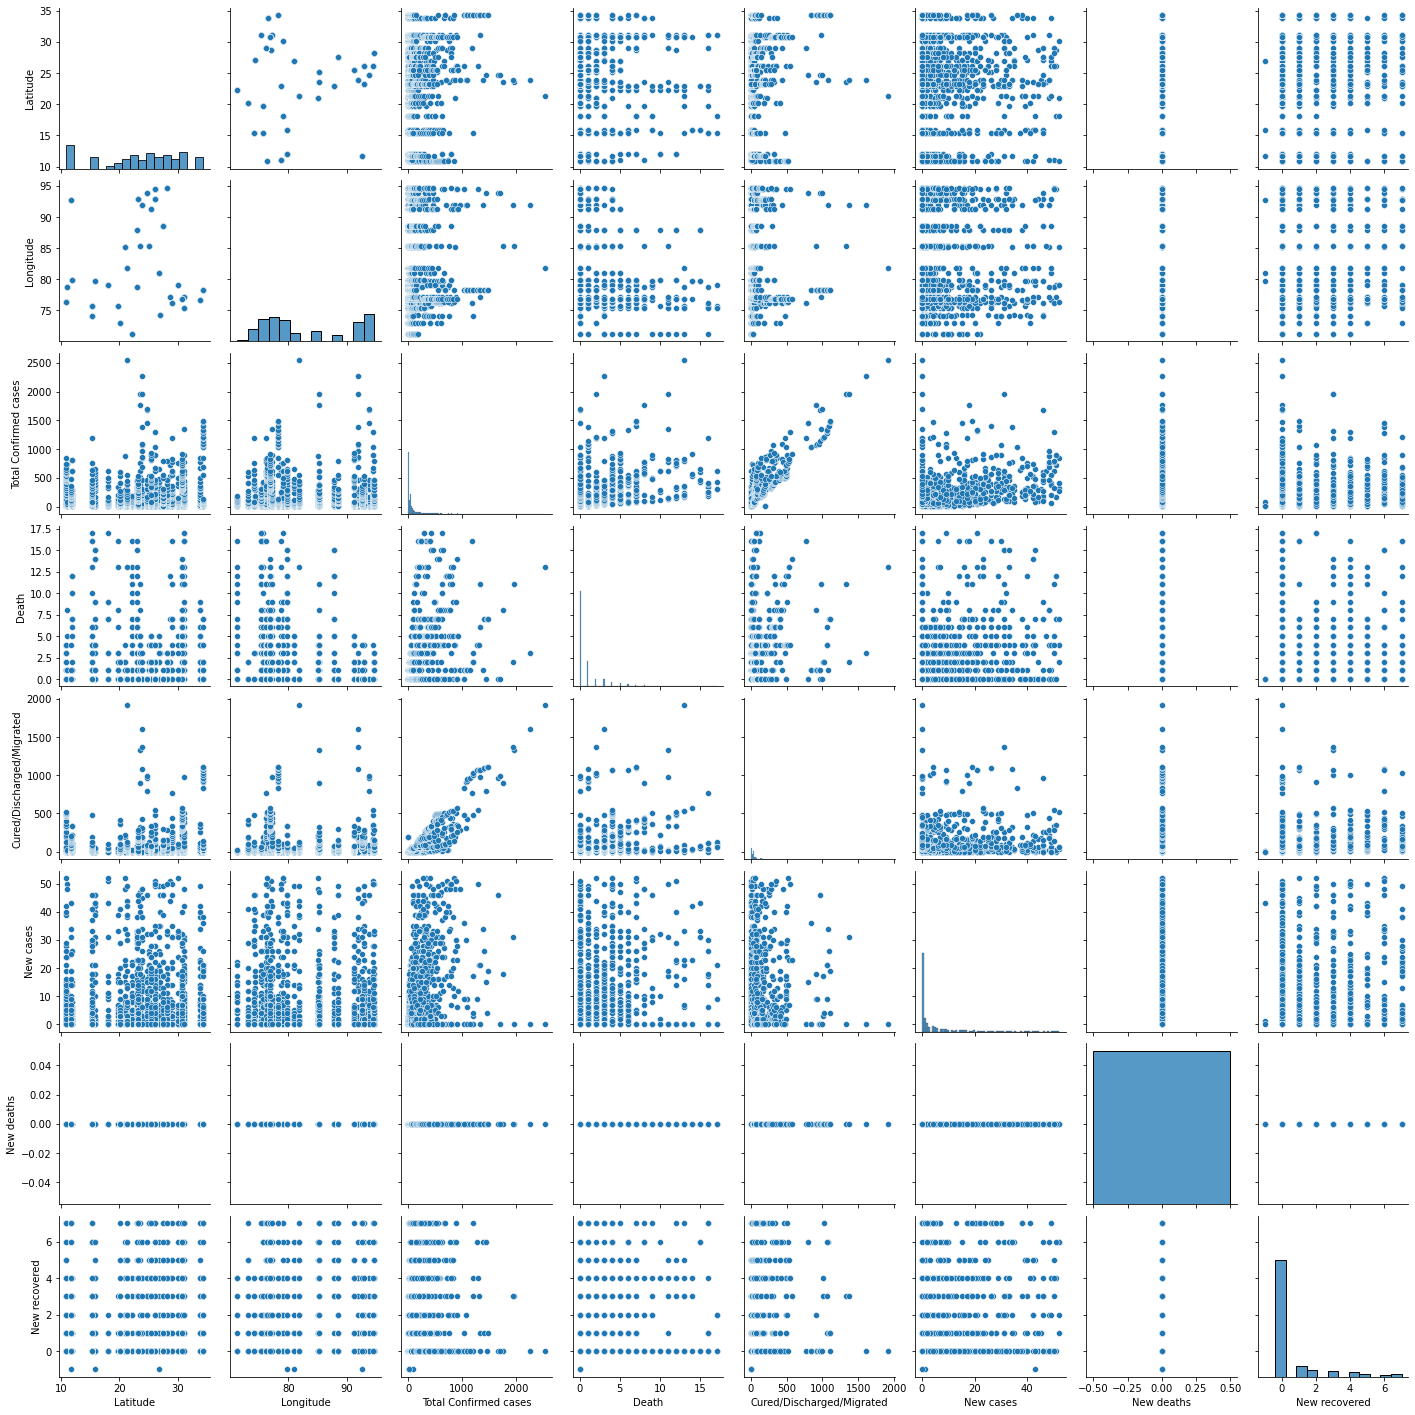

In [172]:
sns.pairplot(covid_data2)

##### 3.Normalization

This scaler normalizes the data using the minimum and maximum values of the feature to a value between 0 and 1

In [182]:
# performing MinMax scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# features= covid_data1.iloc[:,[4,6,7,8]].values
# features.shape

In [183]:
covid_data1

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
0,2020-01-30,Kerala,1,0,0.0,0,0.0
1,2020-01-31,Kerala,1,0,0.0,0,0.0
2,2020-02-01,Kerala,2,0,0.0,1,0.0
3,2020-02-02,Kerala,3,0,0.0,1,0.0
4,2020-02-03,Kerala,3,0,0.0,0,0.0
...,...,...,...,...,...,...,...
4604,2020-08-04,Ladakh,1485,7,1109.0,19,1.0
4608,2020-08-04,Meghalaya,902,5,264.0,28,0.0
4678,2020-08-06,Meghalaya,929,5,330.0,12,0.0
4679,2020-08-06,Mizoram,537,0,286.0,33,4.0


In [184]:
covid_data1.describe()

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,117.154541,1.216358,51.578697,5.330005,0.716120
std,230.043235,2.582654,145.005329,10.201420,1.597382
min,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,6.000000,0.000000,0.000000
75%,107.500000,1.000000,35.000000,5.000000,0.000000
max,2545.000000,17.000000,1914.000000,52.000000,7.000000


In [185]:
covid_data1.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered'],
      dtype='object')

In [187]:
mms = MinMaxScaler()

covid_data1[['Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered'
       ]] = mms.fit_transform(covid_data1[['Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered']])
covid_data1

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
0,2020-01-30,Kerala,0.000000,0.000000,0.000000,0.000000,0.125
1,2020-01-31,Kerala,0.000000,0.000000,0.000000,0.000000,0.125
2,2020-02-01,Kerala,0.000393,0.000000,0.000000,0.019231,0.125
3,2020-02-02,Kerala,0.000786,0.000000,0.000000,0.019231,0.125
4,2020-02-03,Kerala,0.000786,0.000000,0.000000,0.000000,0.125
...,...,...,...,...,...,...,...
4604,2020-08-04,Ladakh,0.583333,0.411765,0.579415,0.365385,0.250
4608,2020-08-04,Meghalaya,0.354167,0.294118,0.137931,0.538462,0.125
4678,2020-08-06,Meghalaya,0.364780,0.294118,0.172414,0.230769,0.125
4679,2020-08-06,Mizoram,0.210692,0.000000,0.149425,0.634615,0.625


In [188]:
covid_data1.describe()

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,0.045658,0.071550,0.026948,0.102500,0.214515
std,0.090426,0.151921,0.075760,0.196181,0.199673
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001965,0.000000,0.000000,0.000000,0.125000
50%,0.012579,0.000000,0.003135,0.000000,0.125000
75%,0.041863,0.058824,0.018286,0.096154,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#####  4.Feature Reduction on Covid Data

In [173]:
## nunique() method will print the counts of unique numbers in each column
covid_data1.nunique()

Date                         183
Name of State / UT            38
Latitude                      35
Longitude                     31
Total Confirmed cases        432
Death                         18
Cured/Discharged/Migrated    252
New cases                     53
New deaths                     1
New recovered                  9
dtype: int64

Columns that have a single observation or value are probably useless for modeling. These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero. In the covid dataset we have 'New Deaths' column with a dingle value. So we can drop that column for a better performance.

In [174]:
# Dropping the New deaths along with the Latitude and Longitude column

covid_data1=covid_data1.drop(['New deaths','Latitude','Longitude'], axis = 1)
covid_data1.shape

(2103, 7)

##### 5.Standardization/Normalization

##### 6.Feature Engineering on given Covid Data

In [175]:
# Creating a new column
covid_data2["Active_cases"] = covid_data2["Total Confirmed cases"] - (covid_data2["Cured/Discharged/Migrated"] + covid_data2["Death"])

In [176]:
# creating a duplicate data set

covid_data3 = covid_data.copy()

In [177]:
covid_data2.duplicated().value_counts()

False    2103
dtype: int64

We have no duplicate values

<AxesSubplot:>

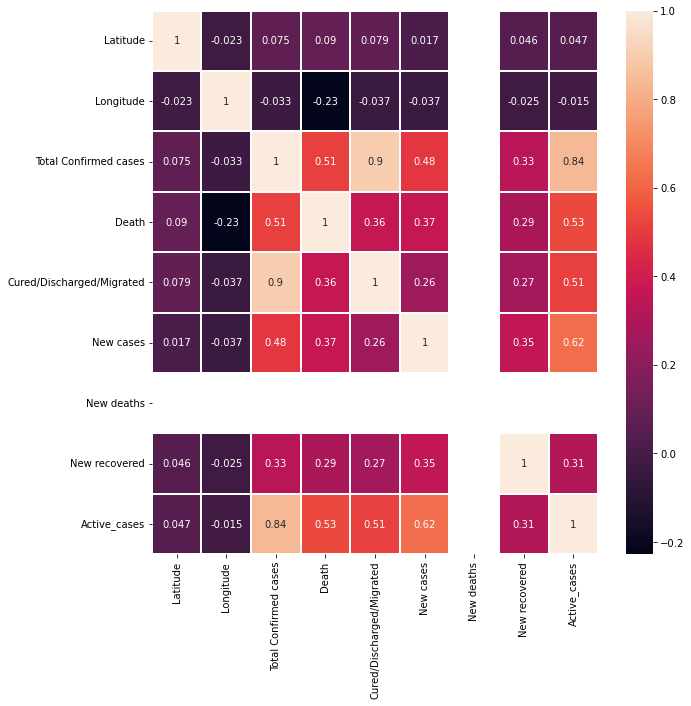

In [178]:
# Replotting the Co-relation matrix. 

corrmatrix=covid_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2)

We can see a high positive correlation btw the features : Total Confirmed cases,Cured/Discharged/Migrated, Active cases with the Death column.

<b>New cases,<b>New recovered, are also having positive co-relation with Death column

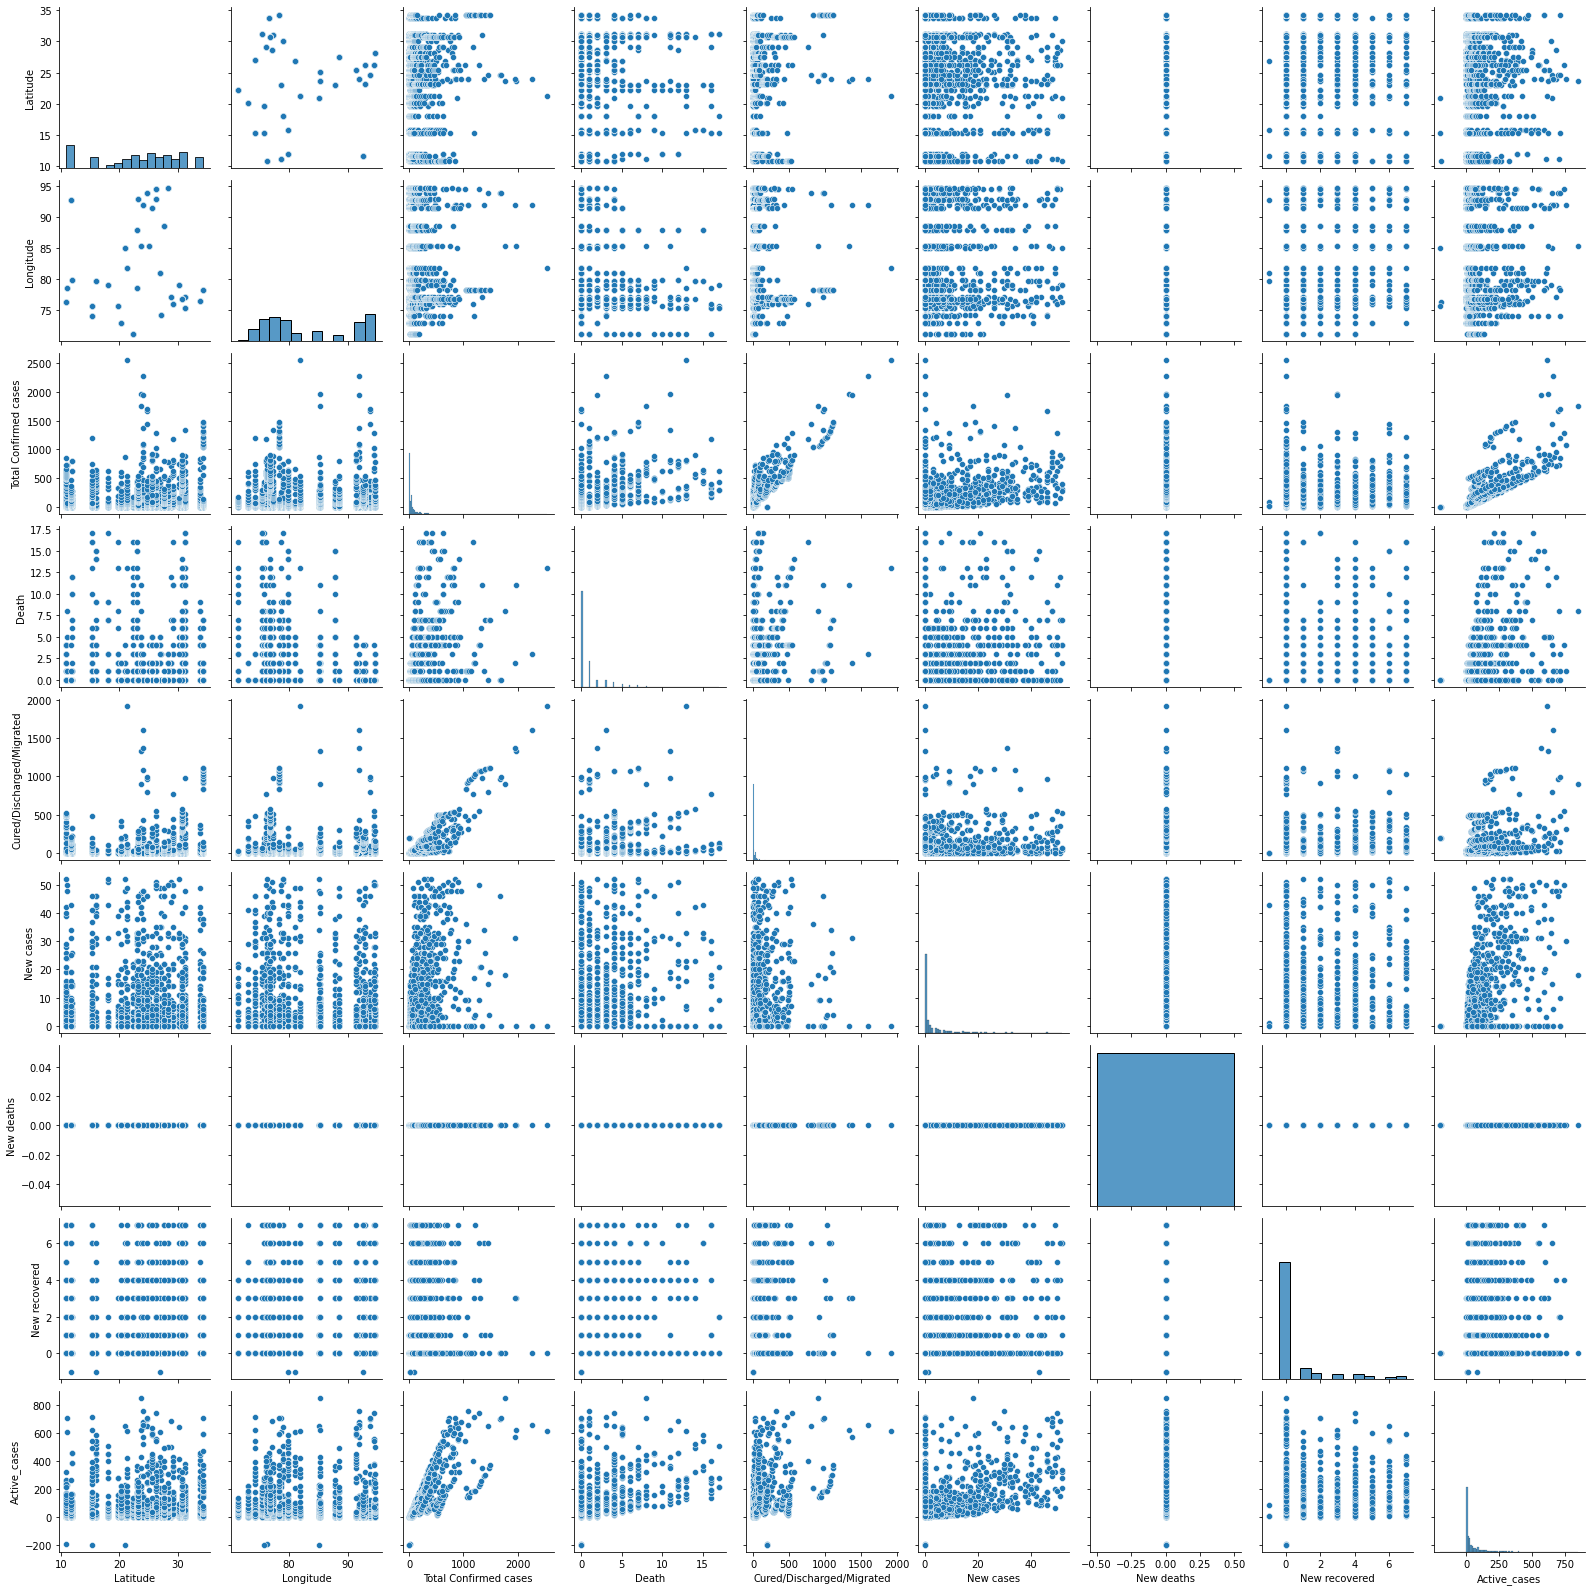

In [180]:
sns.pairplot(covid_data2)

In [181]:
covid_data2.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Active_cases
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0,1.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0,1.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0,2.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0,3.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0,3.0


# 3.Exploratory Data Analysis

### a. Univariate analysis

1) Univariate time series for Total Confirmed cases



[Note : We'll be making various analysis with our original dataset]

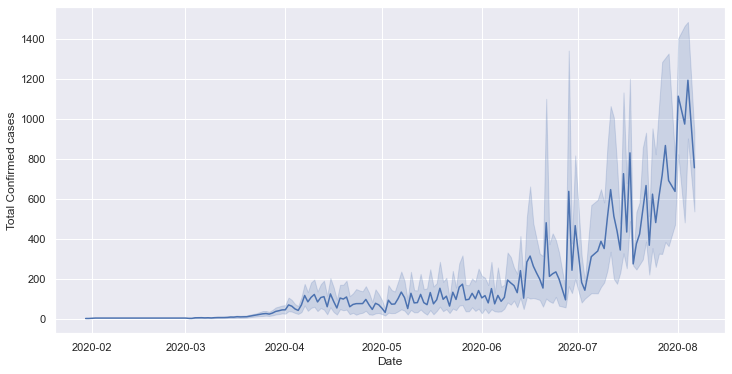

In [189]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Total Confirmed cases", data = covid_data3)
plt.show()

We can see that the in the initial 4 months the cases were very few, However from the 5 th moth onwards there is a sharp increase in the number of cases

2) Univariate time series for Death toll

<AxesSubplot:xlabel='Date', ylabel='Death'>

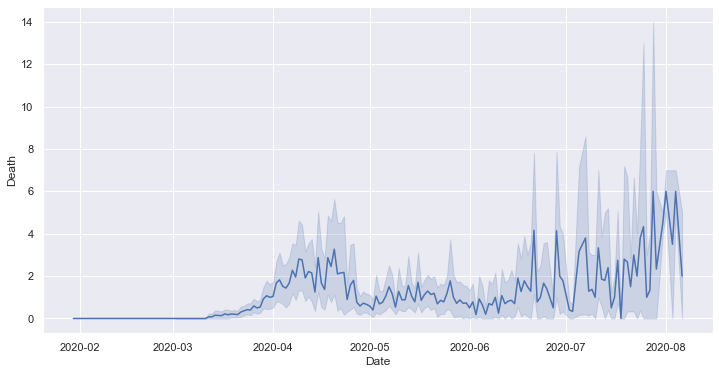

In [191]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Death", data = covid_data3)

Theres a steady increase in death count from fourth month (05-2020) onwards and the death toll climbs sharply from the fifth month onwards (thats when the total cases also started increasing).

3.) Univariate Time series analysis for Cured/Discharged/Migrated

<AxesSubplot:xlabel='Date', ylabel='Cured/Discharged/Migrated'>

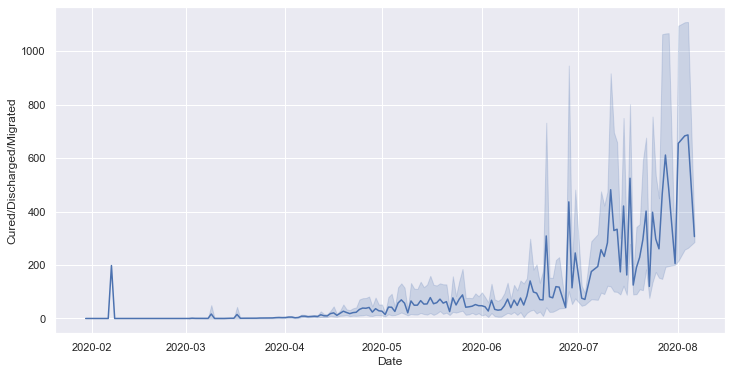

In [192]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Cured/Discharged/Migrated", data = covid_data)

Here we can see that , the number of people recovering from Covid is also on the raise. This is a good factor.

Histograms for various data features

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Total Confirmed cases'}>,
        <AxesSubplot:title={'center':'Death'}>,
        <AxesSubplot:title={'center':'Cured/Discharged/Migrated'}>],
       [<AxesSubplot:title={'center':'New cases'}>,
        <AxesSubplot:title={'center':'New deaths'}>,
        <AxesSubplot:title={'center':'New recovered'}>],
       [<AxesSubplot:title={'center':'Active_cases'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

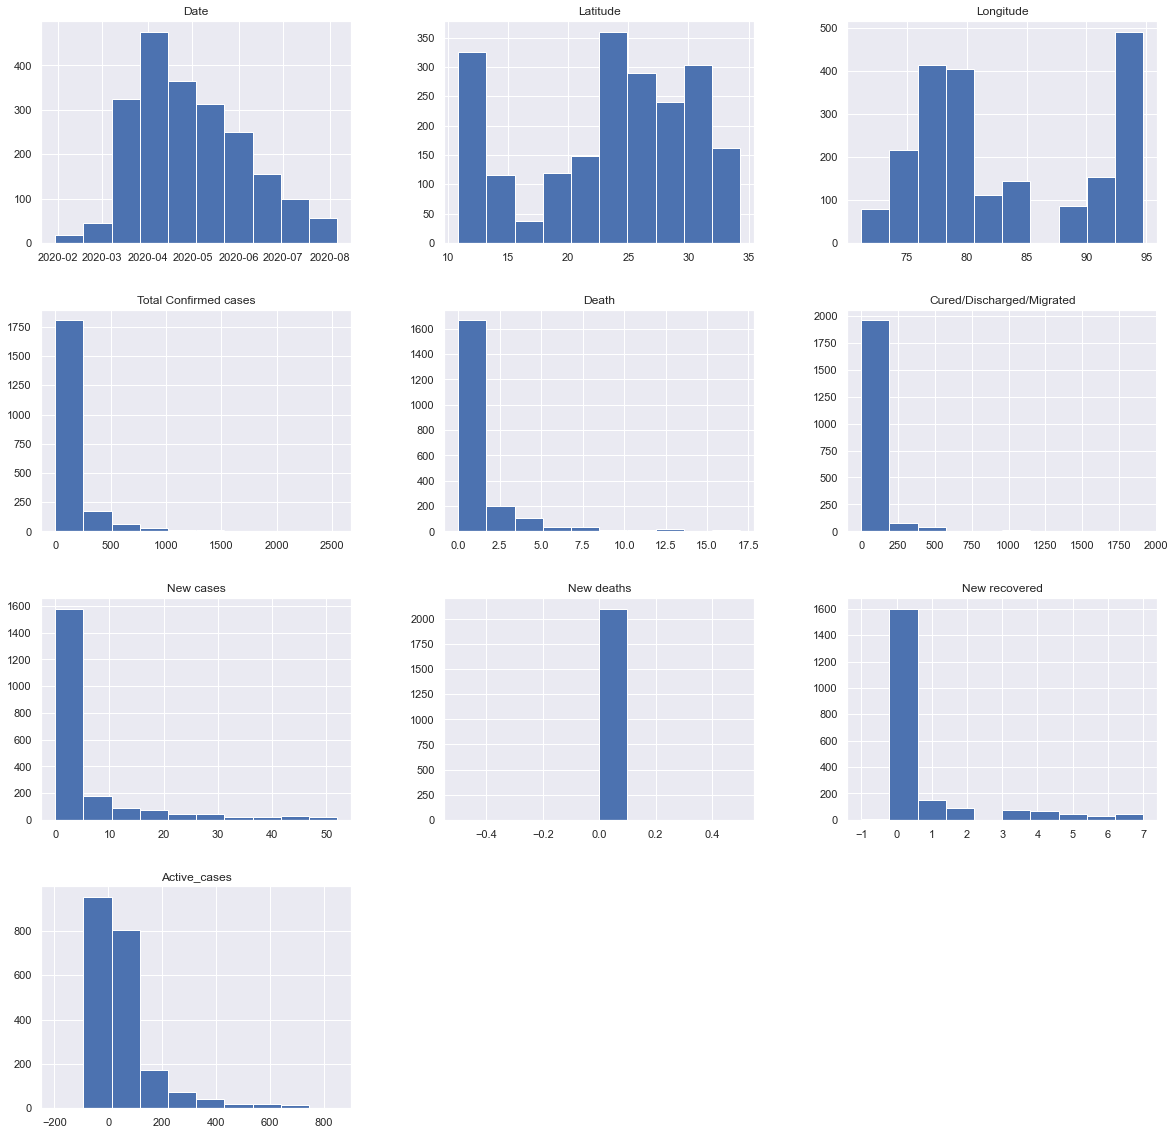

In [193]:
covid_data3.hist(figsize=(20,20))

##### b) Performing some Bivariate analysis

Plotting a scatter plot between Total Confirmed cases and Cured/Discharged/Migrated

<AxesSubplot:xlabel='Total Confirmed cases', ylabel='Cured/Discharged/Migrated'>

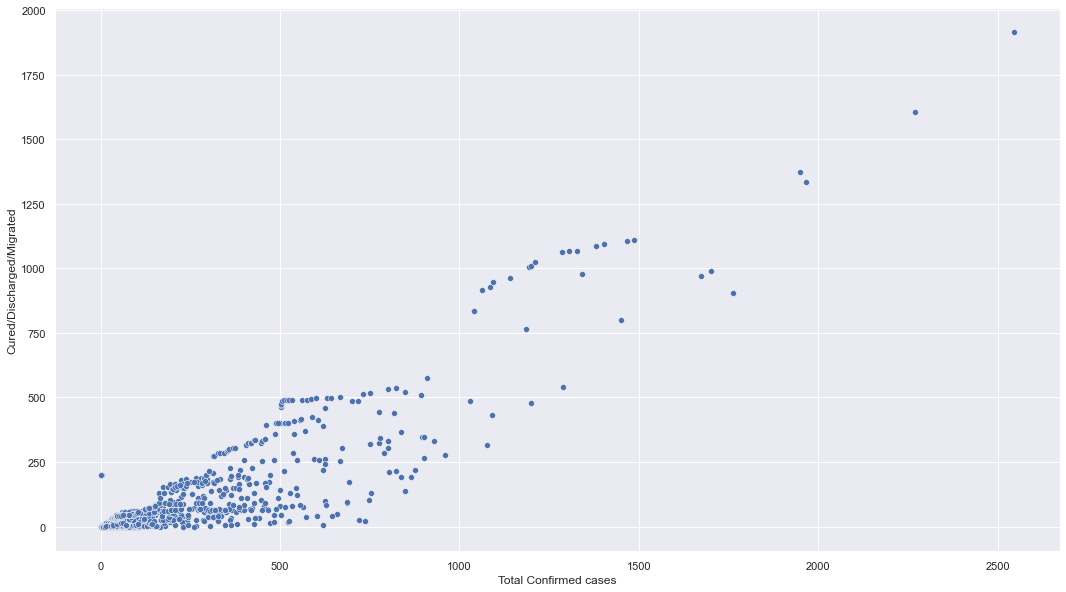

In [194]:
plt.figure(figsize=(18,10))
sns.scatterplot(x = "Total Confirmed cases", y = "Cured/Discharged/Migrated",data = covid_data3)

The good thing we can notice here is that: as the total number of cases increases, the number of people recovering also increases.

In the initial stages the recovery rate was low but as the time passed the number of people recovering also increased,

*Plotting a scatter plot between Total Confirmed cases and Deathfeature*

<AxesSubplot:xlabel='Total Confirmed cases', ylabel='Death'>

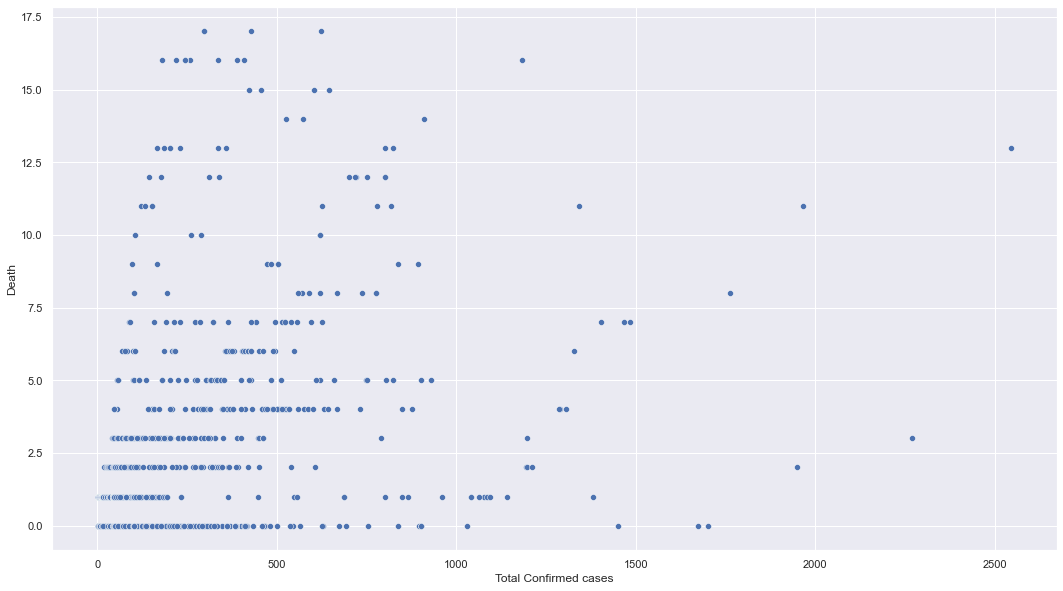

In [195]:
plt.figure(figsize=(18,10))
sns.scatterplot(x = "Total Confirmed cases", y = "Death",data = covid_data3)

The worrying part of the data is that : With the increase in cases the Death toll also increased.

# 4. Modelling

[NOTE : We have already created a Random Forest in the earlier stages using the original dataset, as outliers don't affect RF models ]

Here, we'll be making more models to see which model will be a better fit.

[Note : We'll be using the outlier removed dataset for the following models, i.e. " covid_data3 "]

In [196]:
covid_data3.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Active_cases
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0,1.0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0.0,0,0,0.0,1.0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0.0,1,0,0.0,2.0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0.0,1,0,0.0,3.0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0.0,0,0,0.0,3.0


In this model we'll be trying to predict the <b>Death count feature

In [197]:
# Selecting our dependent and independent variables

X = covid_data3.drop(['Date', 'Name of State / UT', 'Death'], axis = 1)
y = covid_data3['Death']

# Splitting and training our cleaned dataset

X_train,X_test,y_train,y_test=train_test_split(X, y ,test_size=0.25,random_state=150)
X_train.head()

,Latitude,Longitude,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Active_cases
1159,34.2996,78.2932,18,14.0,0,0,0.0,4.0
1175,11.7401,92.6586,16,11.0,0,0,0.0,5.0
284,11.9416,79.8083,1,0.0,0,0,0.0,1.0
30,10.8505,76.2711,3,0.0,0,0,0.0,3.0
972,23.1645,92.9376,1,0.0,0,0,0.0,1.0


#### 1) Linear Regression Model

In [198]:
from sklearn.linear_model import LinearRegression

## create an instance of the class LinearRegression, which will represent the regression model:

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
r_sq = lr_model.score(X_train,y_train)

print('coefficient of determination:', r_sq)
print('\nintercept:', lr_model.intercept_)
print('\nslope:', lr_model.coef_)

y_pred = lr_model.predict(X_test)

from math import sqrt

print("\nMAE = ", mean_absolute_error(y_test,y_pred))
print("\nMSE = ", mean_squared_error(y_test,y_pred))
print("\nR2 Value = ", r2_score(y_test,y_pred))
print("\nAdjusted R2 = ", 1 - (1-lr_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

print('\npredicted response:', y_pred, sep='\n')

coefficient of determination: 1.0

intercept: 9.525713551283843e-14

slope: [ 4.47979251e-17 -1.32914879e-15  1.00000000e+00 -1.00000000e+00
 -2.04106209e-16  1.66533454e-16  2.57626540e-15 -1.00000000e+00]

MAE =  2.081490664841295e-14

MSE =  1.1698984816724945e-27

R2 Value =  1.0

Adjusted R2 =  1.0

predicted response:
[-2.96429548e-14 -2.68673972e-14  1.46438417e-13  1.00000000e+00
 -8.43769499e-15  1.10000000e+01 -2.22044605e-15 -3.24185123e-14
 -8.10462808e-15 -1.27675648e-14 -1.12132525e-14 -2.96429548e-14
 -3.33066907e-15  5.00000000e+00  1.00000000e+00  1.60000000e+01
 -5.77315973e-15 -1.52100554e-14  1.00000000e+00 -3.77475828e-15
  3.00000000e+00  4.44089210e-15 -2.90878432e-14 -4.88498131e-15
 -9.10382880e-15  3.00000000e+00 -1.92068583e-14  2.00000000e+00
  2.00000000e+00 -3.88578059e-15 -2.22044605e-14 -1.90958360e-14
 -5.32907052e-15 -3.10862447e-15 -2.96429548e-14  1.00000000e+00
  2.25375274e-14 -1.03250741e-14 -1.06581410e-14 -2.68673972e-14
  1.56541446e-14 -1.6098

Based on the performance metrics score , the Linear Regression model seems to be apt for this model.

#### 2) KNN Model

Text(0, 0.5, 'mse')

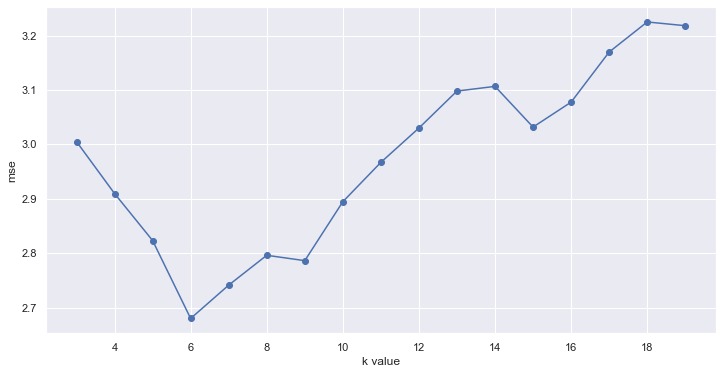

In [199]:
from sklearn.neighbors import KNeighborsRegressor

mse_val = []
neighbors = np.arange(3,20) 
for k in neighbors:
    #creating an instance for knn
    regressor = KNeighborsRegressor(n_neighbors=k,metric = "minkowski") # mentioning the k values , 
    # and type of distance measurement
    regressor.fit(X_train,y_train)
    predicts = regressor.predict(X_test) #Here we've finished building the model.
    # Next, we append the mse values to the empty list, to find the minimum mse value
    mse = mean_squared_error(y_test,predicts)
    mse_val.append(mse)


plt.plot(neighbors,mse_val,"o-") # o- will plot with a line joining all the dots
plt.xlabel("k value")
plt.ylabel("mse")

In [200]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=18)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=18)

In [201]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.8520398457854796

In [202]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

1.7958392820461044

In [203]:
print("MAE = ", mean_absolute_error(y_test,test_preds))
print("MSE = ", mean_squared_error(y_test,test_preds))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,test_preds))
print("Adjusted R2 = ", 1 - (1-knn_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.8943810730882974
MSE =  3.2250387269398675
RMSE =  1.7958392820461044
R2 Value =  0.510808692697847
Adjusted R2 =  0.49126786162134695


This model is not Suitable for prediction.

#### 3) SVR

In [204]:
from sklearn.svm import SVR

#Linear SVR
svm_linear = SVR(kernel= "linear") # selecting the linear kernel
svm_linear.fit(X_train,y_train)
svm_pred = svm_linear.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_pred))

print("MAE = ", mean_absolute_error(y_test,svm_pred))
print("MSE = ", mean_squared_error(y_test,svm_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_pred))
print("Adjusted R2 = ", 1 - (1-svm_linear.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.08610027696330011
MSE =  0.007845975486108577
RMSE =  0.0885775111758542
R2 Value =  0.9988098800262308
Adjusted R2 =  0.9988119679560926


In [205]:
#POLYNOMIAL SVM

svm_poly = SVR(kernel= "poly") # selecting the linear kernel
svm_poly.fit(X_train,y_train)
svm_p_pred = svm_poly.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_p_pred))

print("MAE = ", mean_absolute_error(y_test,svm_p_pred))
print("MSE = ", mean_squared_error(y_test,svm_p_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_p_pred))
print("Adjusted R2 = ", 1 - (1-svm_poly.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  1.1342855045662035
MSE =  15.223478810095504
RMSE =  3.901727669904129
R2 Value =  -1.3091795576246121
Adjusted R2 =  -0.08993306335745244


In [206]:
#RBF SVM

svm_radial = SVR(kernel="rbf")
svm_radial.fit(X_train,y_train)
svm_r_pred = svm_radial.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_r_pred))

print("MAE = ", mean_absolute_error(y_test,svm_r_pred))
print("MSE = ", mean_squared_error(y_test,svm_r_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_r_pred))
print("Adjusted R2 = ", 1 - (1-svm_radial.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.9482860038663696
MSE =  3.9191675944670656
RMSE =  1.9796887620196932
R2 Value =  0.4055194739032584
Adjusted R2 =  0.3929520060320373


Linear , Polynomial, RBF kernel based SVM Regression model gives us low performance scores hence they can be avoided.

#### 4) Decision tree Regression model

In [207]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,dt_pred))

print("MAE = ", mean_absolute_error(y_test,dt_pred))
print("MSE = ", mean_squared_error(y_test,dt_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,dt_pred))

MAE =  0.3365019011406844
MSE =  1.5874524714828897
RMSE =  1.2599414555775557
R2 Value =  0.75920662802657


This one is not an ideal model

#### 5) Random Forest Reg Model

In [208]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,rf_pred))

print("MAE = ", mean_absolute_error(y_test,rf_pred))
print("MSE = ", mean_squared_error(y_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,rf_pred))

MAE =  0.28828897338403037
MSE =  0.4608410646387833
RMSE =  0.6788527562283174
R2 Value =  0.9300971362030512


In [209]:
pd.Series(rf_model.feature_importances_,index = X.columns).sort_values(ascending=False)*100

Longitude                    29.595436
Total Confirmed cases        28.886724
Active_cases                 20.636489
Latitude                      9.553651
Cured/Discharged/Migrated     7.531111
New cases                     2.813903
New recovered                 0.982686
New deaths                    0.000000
dtype: float64

In [210]:
# Changing the Hyper parameters and see =ing the results

rf1 = RandomForestRegressor(n_estimators=800, max_depth=10,random_state=150)
rf1.fit(X_train,y_train)
predict1 = rf1.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predict1))

print("MAE = ", mean_absolute_error(y_test,predict1))
print("MSE = ", mean_squared_error(y_test,predict1))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,predict1))

MAE =  0.3203131717258071
MSE =  0.5525754186619685
RMSE =  0.7433541677168215
R2 Value =  0.9161823735075653


Adjusting the Hyper parametrs is not helping improve accuracy

#### 6)Gradient Boosting Model

In [212]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,gb_pred))

print("MAE = ", mean_absolute_error(y_test,gb_pred))
print("MSE = ", mean_squared_error(y_test,gb_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,gb_pred))

MAE =  0.483585269747044
MSE =  0.7232363625918621
RMSE =  0.8504330441556596
R2 Value =  0.8902955990111545


Not ideal as the performance metrics values are low

<B>After analysing all the above models we can say that : A linear Regression model fits our purpose most accuaretly in the current scenario.

#### 5) Model Fine Tuning :

Our Linear Regression Model doesnt need any further tuning, as we've got a good performace scores